In [1]:
import urllib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

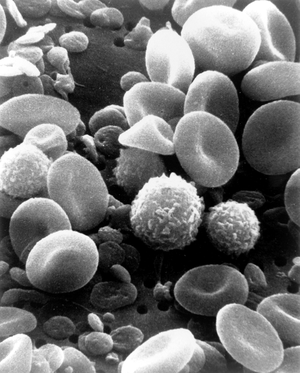

In [2]:
blood_cells = Image.open('blood.jpg')

base_width = 300

wpercent = (base_width / float(blood_cells.size[0]))

hsize = int((float(blood_cells.size[1]) * float(wpercent)))

img1 = blood_cells.resize((base_width, hsize), Image.Resampling.LANCZOS)

img1

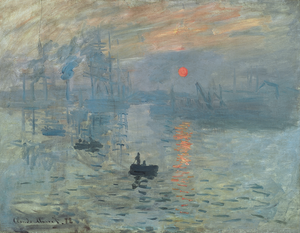

In [3]:
img2 = Image.open('monet.jpg')

base_width = 300

wpercent = (base_width / float(img2.size[0]))

hsize = int((float(img2.size[1]) * float(wpercent)))

img2 = img2.resize((base_width, hsize), Image.Resampling.LANCZOS)

img2

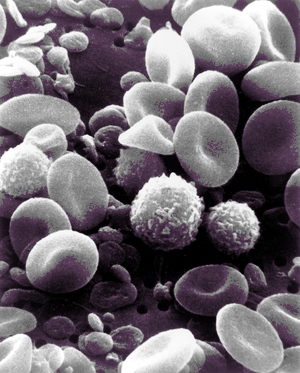

In [4]:
source = img1.split()

R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = source[R].point(lambda i: i < 100 and 255)

# process the green band
out = source[G].point(lambda i: i * 0.7)

# paste the processed band back, but only where red was < 100
source[G].paste(out, None, mask)

# build a new multiband image
img3 = Image.merge(img1.mode, source)

img3


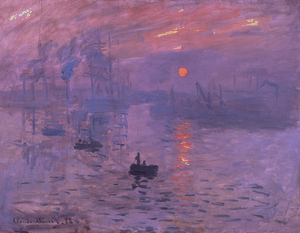

In [5]:
source = img2.split()

R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = source[R].point(lambda i: i < 200 and 255)

# process the green band
out = source[G].point(lambda i: i * 0.7)

# paste the processed band back, but only where red was < 100
source[G].paste(out, None, mask)

# build a new multiband image
img4 = Image.merge(img2.mode, source)

img4


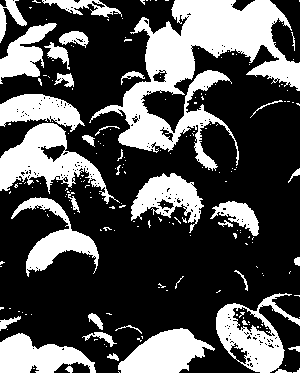

In [6]:
threshold = 150

img1_threshold = img1.point(
    lambda x: 255 if x > threshold else 0
)

img1_threshold

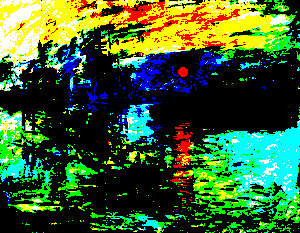

In [7]:
threshold = 150

img2_threshold = img2.point(
    lambda x: 255 if x > threshold else 0
)

img2_threshold

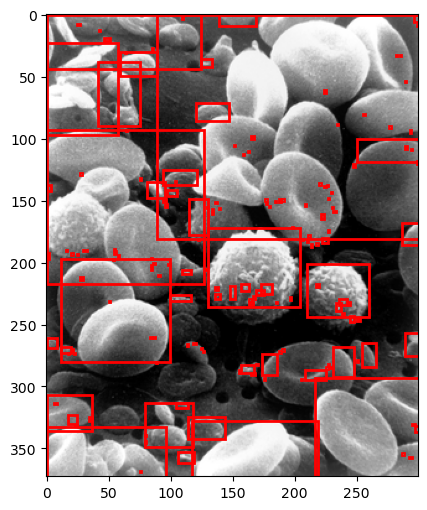

Region label: 1
Bounding box: (0, 0, 44, 124)
Area: 1527.0
Perimeter: 475.43354954612926


Region label: 2
Bounding box: (0, 139, 9, 169)
Area: 159.0
Perimeter: 70.66295090390226


Region label: 3
Bounding box: (0, 89, 181, 300)
Area: 15439.0
Perimeter: 2010.9200564096436


Region label: 4
Bounding box: (0, 296, 6, 300)
Area: 10.0
Perimeter: 7.0


Region label: 5
Bounding box: (2, 109, 3, 110)
Area: 1.0
Perimeter: 0.0


Region label: 6
Bounding box: (7, 24, 8, 27)
Area: 3.0
Perimeter: 1.0


Region label: 7
Bounding box: (8, 299, 9, 300)
Area: 1.0
Perimeter: 0.0


Region label: 8
Bounding box: (12, 42, 13, 43)
Area: 1.0
Perimeter: 0.0


Region label: 9
Bounding box: (19, 46, 21, 51)
Area: 9.0
Perimeter: 9.207106781186548


Region label: 10
Bounding box: (23, 0, 97, 57)
Area: 1826.0
Perimeter: 352.5929291125633


Region label: 11
Bounding box: (27, 85, 28, 86)
Area: 1.0
Perimeter: 0.0


Region label: 12
Bounding box: (30, 63, 31, 64)
Area: 1.0
Perimeter: 0.0


Region label: 13
Bounding b

In [8]:
from skimage import io, color, measure

gray_image = color.rgb2gray(img1)

# Apply thresholding to create a binary image
threshold_value = 0.5  # Adjust this threshold value as needed
binary_image = gray_image > threshold_value

# Label connected components in the binary image
labeled_image = measure.label(binary_image)

# Extract region properties
regions = measure.regionprops(labeled_image)

# Display the original image with region boundaries
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(img1)

# Plot the region boundaries
for region in regions:
    minr, minc, maxr, maxc = region.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

# Display the image with region boundaries
plt.show()

# Extract data about the regions
for region in regions:
    print(f"Region label: {region.label}")
    print(f"Bounding box: {region.bbox}")
    print(f"Area: {region.area}")
    print(f"Perimeter: {region.perimeter}")
    print("\n")

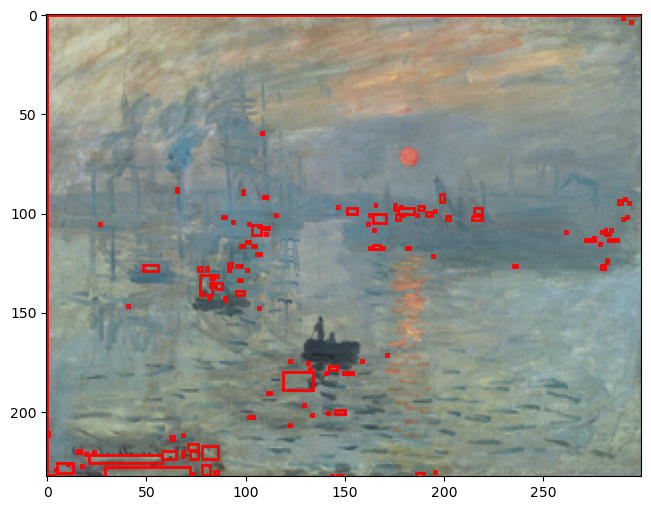

Region label: 1
Bounding box: (0, 0, 233, 300)
Area: 55766.0
Perimeter: 8633.055767233434


Region label: 2
Bounding box: (1, 290, 2, 291)
Area: 1.0
Perimeter: 0.0


Region label: 3
Bounding box: (3, 294, 4, 295)
Area: 1.0
Perimeter: 0.0


Region label: 4
Bounding box: (59, 108, 60, 109)
Area: 1.0
Perimeter: 0.0


Region label: 5
Bounding box: (87, 65, 89, 66)
Area: 2.0
Perimeter: 0.0


Region label: 6
Bounding box: (88, 98, 90, 99)
Area: 2.0
Perimeter: 0.0


Region label: 7
Bounding box: (90, 198, 94, 200)
Area: 6.0
Perimeter: 5.0


Region label: 8
Bounding box: (91, 109, 92, 111)
Area: 2.0
Perimeter: 0.0


Region label: 9
Bounding box: (92, 291, 93, 292)
Area: 1.0
Perimeter: 0.0


Region label: 10
Bounding box: (93, 288, 95, 290)
Area: 4.0
Perimeter: 4.0


Region label: 11
Bounding box: (94, 293, 95, 294)
Area: 1.0
Perimeter: 0.0


Region label: 12
Bounding box: (95, 165, 96, 166)
Area: 1.0
Perimeter: 0.0


Region label: 13
Bounding box: (95, 175, 98, 176)
Area: 3.0
Perimeter: 1.0




In [9]:

gray_image = color.rgb2gray(img2)

# Apply thresholding to create a binary image
threshold_value = 0.5  # Adjust this threshold value as needed
binary_image = gray_image > threshold_value

# Label connected components in the binary image
labeled_image = measure.label(binary_image)

# Extract region properties
regions = measure.regionprops(labeled_image)

# Display the original image with region boundaries
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(img2)

# Plot the region boundaries
for region in regions:
    minr, minc, maxr, maxc = region.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

# Display the image with region boundaries
plt.show()

# Extract data about the regions
for region in regions:
    print(f"Region label: {region.label}")
    print(f"Bounding box: {region.bbox}")
    print(f"Area: {region.area}")
    print(f"Perimeter: {region.perimeter}")
    print("\n")

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = img2

# Convert the image from BGR to RGB (OpenCV loads images in BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define color ranges for the sun and boat in RGB format
sun_color_lower = np.array([200, 200, 0], dtype=np.uint8)
sun_color_upper = np.array([255, 255, 100], dtype=np.uint8)

boat_color_lower = np.array([0, 0, 100], dtype=np.uint8)
boat_color_upper = np.array([50, 50, 255], dtype=np.uint8)

# Create masks for the sun and boat based on color ranges
sun_mask = cv2.inRange(image_rgb, sun_color_lower, sun_color_upper)
boat_mask = cv2.inRange(image_rgb, boat_color_lower, boat_color_upper)

# Find contours in the masks
sun_contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boat_contours, _ = cv2.findContours(boat_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
image_with_contours = image_rgb.copy()
cv2.drawContours(image_with_contours, sun_contours, -1, (0, 255, 0), 2)
cv2.drawContours(image_with_contours, boat_contours, -1, (0, 0, 255), 2)

# Display the original image with contours
plt.imshow(image_with_contours)
plt.show()


ImportError: DLL load failed while importing cv2: The specified module could not be found.